In [46]:
'''
1. Get paths to rtf files (glob)
2. Read rtf files into strings (striprtf)
3. Use regular expressions to extract relevant information from the strings (re)
4. Format information to desirable format (datetime)
'''
import glob 
from striprtf.striprtf import rtf_to_text
import re
from datetime import datetime as dt
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import statistics as stats
from collections import Counter 
import pickle

In [48]:
# read data into strings

texts = []

for path in glob.glob('data/SCMP/*.rtf'):
    with open(path, 'r') as file:
        rtf = file.read()
        text = rtf_to_text(rtf)
        texts.append(text)

# save data for later use
file = open(f'data/SCMP/all.pkl', 'wb')
pickle.dump(texts, file)
file.close()

In [49]:
# load saved data

file = open(f'data/SCMP/all.pkl', 'rb')
texts = pickle.load(file)
file.close()

In [52]:
#construct a table for article metadata

title = []
body = []
words = []
date = []

for i, text in enumerate(texts):
    
    tit = re.search(r'(.*)\nSouth China Morning Post.com', text).group(1)
    title.append(tit)
    
    word_count = re.search(r'Length:\xa0(.*) words', text).group(1)
    words.append(float(word_count))
    
    dat = dt.strptime(re.search(r'South China Morning Post.com\n(\w+ \w+, \w+)', text).group(1), "%B %d, %Y")
    date.append(dat)
    
    text_norows = text.replace('\n', ' ')
    bod = re.search(r'Body   (.*) Copyright', text_norows).group(1)
    body.append(bod)
    
df = pd.DataFrame(columns = ['title', 'body', 'words', 'date'])
df['title'] = title
df['body'] = body
df['words'] = words
df['date'] = date
df
#df.to_csv('data/SCMP/metadata.csv')

,title,body,words,date
0,Turf war leaves the Jockey Club stuck watching...,"Forget John Moore versus John Size, Zac Purton...",706.0,2017-05-21
1,China must find a holistic approach to clear t...,From the 2008 Beijing Olympic Games to the rec...,392.0,2016-11-09
2,"Millennials place planet before profit, while ...",The rise of the millennial generation is drama...,786.0,2017-01-05
3,Li Keqiang hails golden era for China and Cana...,Chinese Premier Li Keqiang said China and Cana...,674.0,2017-12-04
4,"Small city, big sea: Hong Kong marine life div...","Almost 6,000 species of marine life were recor...",896.0,2017-11-04
...,...,...,...,...
250,Spring is coming earlier to the Tibetan platea...,The time snow starts to thaw and grass starts ...,935.0,2017-09-19
251,No Christmas chill as Hong Kong set for warm w...,Ditch your down jackets and knit caps as Hong ...,293.0,2016-12-21
252,The Chinese public give their verdict on Justi...,Canadian Prime Minister Justin Trudeau is visi...,675.0,2017-12-03
253,Can Hong Kong follow Singapores lead in water ...,Singapore's leaders might not have endeared th...,1103.0,2017-02-26


The average article length is 764.03 and the median length is 643.0

The shortest article has 167.0 words about "Typhoon warning as Hong Kong Observatory issues No 1 signal", published on 2017-07-22.

The longest article has 3522.0 words about "Former top US envoy to China Gary Locke on Trump, trade and strategic mistrust", published on 2016-11-17.




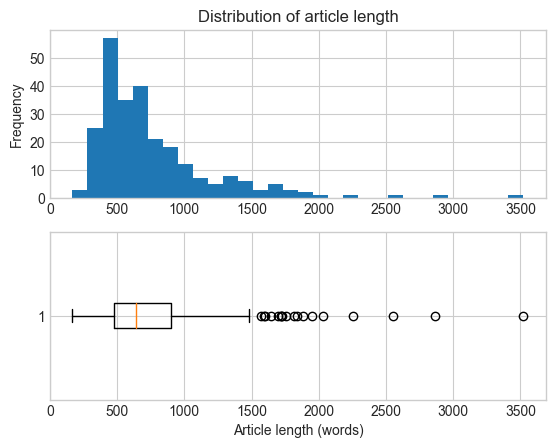

In [33]:
'''
Explore the distribution of media coverage 
on climate change in 2016-2017
'''

plt.style.use('seaborn-v0_8-whitegrid')
# the longest and the shortest articles
min_id = np.argmin(df.words)
max_id = np.argmax(df.words)

print(f'The average article length is {round(stats.mean(df.words),2)} and the median length is {stats.median(df.words)}\n')
print(f'The shortest article has {df.words[min_id]} words about "{df.title[min_id]}", published on {df.date[min_id].date()}.\n')
print(f'The longest article has {df.words[max_id]} words about "{df.title[max_id]}", published on {df.date[max_id].date()}.\n')
    
print()

# histogram of article length
ax1 = plt.subplot(211)
ax1.hist(df.words, bins = 30)
plt.title('Distribution of article length')
plt.ylabel('Frequency')
ax2 = plt.subplot(212)
ax2.boxplot(df.words, vert=False)
plt.xlabel('Article length (words)')
plt.show()

In [44]:
'''
Look further into outliers (length above 1500 words)
'''

long_entries = df[df.words.between(1500, 4000)].sort_values(by=['date']) 
print(f'{len(long_entries)} longest articles (outliers)')
for row in long_entries.iterrows():
    print(row[1]['date'], row[1]['title'], row[1]['words'])

18 longest articles (outliers)
2016-09-17 00:00:00 Could this be Canadas first Chinese prime minister? 1572.0
2016-09-30 00:00:00 Chinas President Xi Jinping faces his biggest political test 1596.0
2016-10-11 00:00:00 Familiarity and contempt: Hillary Clintons 21-year relationship with China 2554.0
2016-11-07 00:00:00 How the China-US relationship evolved, and why it still matters 1838.0
2016-11-17 00:00:00 Former top US envoy to China Gary Locke on Trump, trade and strategic mistrust 3522.0
2017-01-01 00:00:00 Top China issues to watch in 2017 2865.0
2017-01-02 00:00:00 How shrinking dolphin numbers off Hong Kongs largest island point up environmental impact assessments 2028.0
2017-01-09 00:00:00 Is Obamas diplomatic legacy in Asia about to be erased? 1729.0
2017-01-20 00:00:00 How a Hong Kong doctor made international accreditation the norm for local hospitals 1949.0
2017-06-10 00:00:00 From ionising towers to bicycles, Dutchmans smog-removing inventions stand to clear the air in pol

/var/folders/lc/yk3v2sms181c6hpd98wmbd900000gn/T/ipykernel_57663/126457274.py:22: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  plt.plot(date, words_accumulate*100/np.array([float(words_accumulate[-1:])]*len(words_accumulate)))
/var/folders/lc/yk3v2sms181c6hpd98wmbd900000gn/T/ipykernel_57663/126457274.py:26: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  plt.plot(date, articles_accumulate*100/np.array([float(articles_accumulate[-1:])]*len(articles_accumulate)))


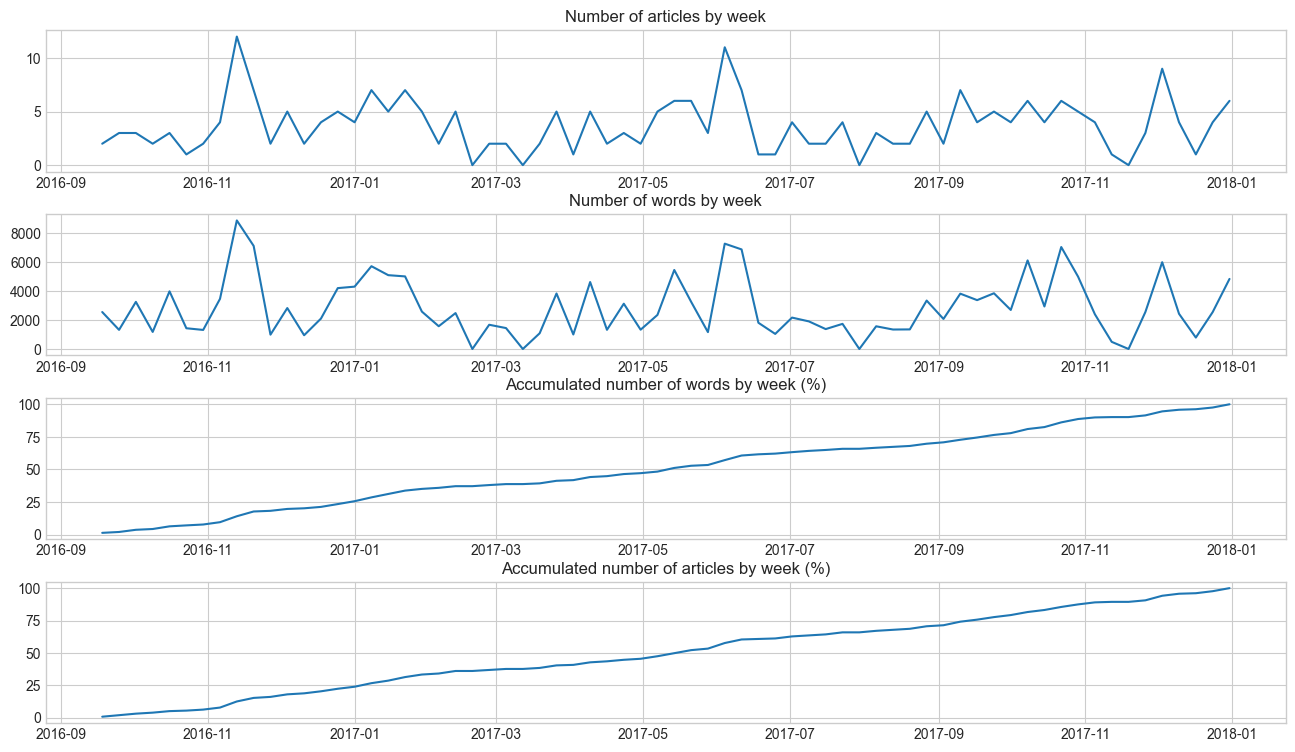

In [40]:
'''
How coverage volume fluctuates over time
'''

data = df.sort_values(by = 'date')
date = articles_pw = data.groupby([pd.Grouper(key='date', freq='W')]).count().reset_index()['date']

articles_pw = data.groupby([pd.Grouper(key='date', freq='W')]).count().reset_index()['title']
articles_accumulate = np.add.accumulate(articles_pw)

words_pw = data.groupby([pd.Grouper(key='date', freq='W')]).sum().reset_index()['words']
words_accumulate = np.add.accumulate(words_pw)

fig_01 = plt.figure(figsize = (16, 9))
fig_01.subplots_adjust(hspace = 0.3)

ax1 = plt.subplot(411)
plt.plot(date, articles_pw)
ax1.set_title('Number of articles by week')

ax2 = plt.subplot(412)
plt.plot(date, words_pw)
ax2.set_title('Number of words by week')

ax3 = plt.subplot(413)
plt.plot(date, words_accumulate*100/np.array([float(words_accumulate[-1:])]*len(words_accumulate)))
ax3.set_title('Accumulated number of words by week (%)')

ax4 = plt.subplot(414)
plt.plot(date, articles_accumulate*100/np.array([float(articles_accumulate[-1:])]*len(articles_accumulate)))
ax4.set_title('Accumulated number of articles by week (%)')

plt.show()

In [39]:
'''
Dates with most published articles
'''

top = Counter(df.date).most_common(2)

print(f'{top[0][0].date()} has the most articles with "climate change" ({top[0][1]} articles):')
for title in df[df.date == top[0][0]].title:
    print(title)

print()

print(f'{top[1][0].date()} has the second most articles with "climate change" ({top[1][1]} articles):')
for title in df[df.date == top[1][0]].title:
    print(title)

2017-06-02 has the most articles with "climate change" (6 articles):
With US out of Paris climate deal, Chinas now able to lead K but is it willing?
Looking back at how Chinas stance on climate change shifted
After Trump turns back on climate, China and EU vow to push Paris deal forward
China flips the switch on worlds biggest floating solar farm
JPMorgans Dimon says he disagrees with Trumps Paris climate accord withdrawal
Trump pulls US from climate pact: Is China set to lead?

2016-11-13 has the second most articles with "climate change" (4 articles):
Hong Kong students lead the charge against modern slavery with 24-hour races
China must go ahead with the Paris climate deal, with or without America
With Obama gone, Trump in, US-China rivalry is set to intensify
China looks to forging effective partnership with Trump administration, says ambassador
